# STEP 1: Importing Libraries/Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
data = pd.read_csv('greenbuildings.csv')

# Quick exploration
print(data.head())

   CS_PropertyID  cluster    size  empl_gr   Rent  leasing_rate  stories  age  \
0         379105        1  260300     2.22  38.56         91.39       14   16   
1         122151        1   67861     2.22  28.57         87.14        5   27   
2         379839        1  164848     2.22  33.31         88.94       13   36   
3          94614        1   93372     2.22  35.00         97.04       13   46   
4         379285        1  174307     2.22  40.69         96.58       16    5   

   renovated  class_a  ...  green_rating  net  amenities  cd_total_07  \
0          0        1  ...             1    0          1         4988   
1          0        0  ...             0    0          1         4988   
2          1        0  ...             0    0          1         4988   
3          1        0  ...             0    0          0         4988   
4          0        1  ...             0    0          1         4988   

   hd_total07  total_dd_07  Precipitation  Gas_Costs  Electricity_Costs  \

# STEP 2: Data Cleaning

In [2]:
cleaned_data = data[data['leasing_rate'] >= 10]
print(cleaned_data.shape)

(7679, 23)


# STEP 3: Descriptive Statistics

In [3]:
# Computing the median market rent for green buildings
median_rent_green = cleaned_data[cleaned_data['green_rating'] == 1]['Rent'].median()

# Computing the median market rent for non-green buildings
median_rent_non_green = cleaned_data[cleaned_data['green_rating'] == 0]['Rent'].median()

print("Median Rent for Green Buildings:", median_rent_green)
print("Median Rent for Non-Green Buildings:", median_rent_non_green)

Median Rent for Green Buildings: 27.6
Median Rent for Non-Green Buildings: 25.03


# STEP 4: Distribution of Rents

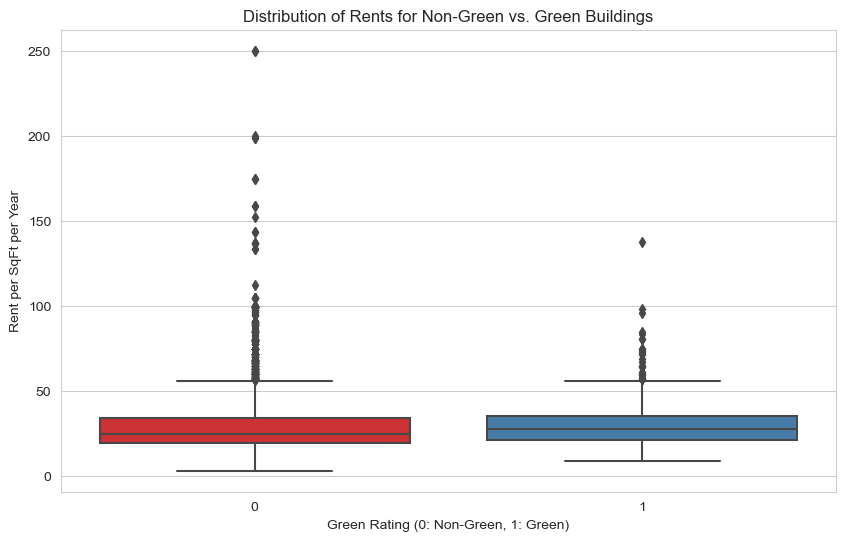

Green Buildings Rent Stats:
 count    685.000000
mean      30.016029
std       12.950078
min        8.870000
25%       21.500000
50%       27.600000
75%       35.500000
max      138.070000
Name: Rent, dtype: float64

Non-Green Buildings Rent Stats:
 count    7209.000000
mean       28.266778
std        15.254134
min         2.980000
25%        19.180000
50%        25.000000
75%        34.000000
max       250.000000
Name: Rent, dtype: float64


In [4]:
# STEP 4: VISUAL COMPARISON OF RENTS

# Setting visualization style
sns.set_style('whitegrid')

# Creating a boxplot for rents for green vs. non-green buildings
plt.figure(figsize = (10,6))
sns.boxplot(x = 'green_rating', y = 'Rent', data = cleaned_data, palette = 'Set1')
plt.title('Distribution of Rents for Non-Green vs. Green Buildings')
plt.xlabel('Green Rating (0: Non-Green, 1: Green)')
plt.ylabel('Rent per SqFt per Year')
plt.show()

# Statistical Descriptions
green_stats = data[data['green_rating'] == 1]['Rent'].describe()
non_green_stats = data[data['green_rating'] == 0]['Rent'].describe()
print('Green Buildings Rent Stats:\n', green_stats)
print('\nNon-Green Buildings Rent Stats:\n', non_green_stats)

OVERVIEW:
When comparing the rental prices between green and non-green buildings, there's a clear distinction in the distribution, which may give us a hint about their potential profitability.

DISTRIBUTION:
On average, green buildings seem to command a slightly higher rent. The median value for green buildings is a testament to this trend. However, it's crucial to highlight that the maximum rent charged by some non-green buildings surpasses even the priciest green ones. This might indicate that there are other factors, aside from being eco-friendly, that contribute to the rent prices of these properties.

VARIABILITY:
The variance in rents is more noticeable in non-green buildings, with a higher standard deviation. It implies that while many non-green buildings might offer lower rent, there are outliers that command significantly higher prices. This variability might be attributed to factors like location, specific amenities, or historical value.

VOLUME:
An overwhelming majoring of the buildings in the dataset are non-green. The disparity in sample size is vital to consider. Drawing conclusions from a smaller sample (green buildings) might not be as representative as those from a larger one (non-green buildings).

# STEP 5: Distribution of Building Classes

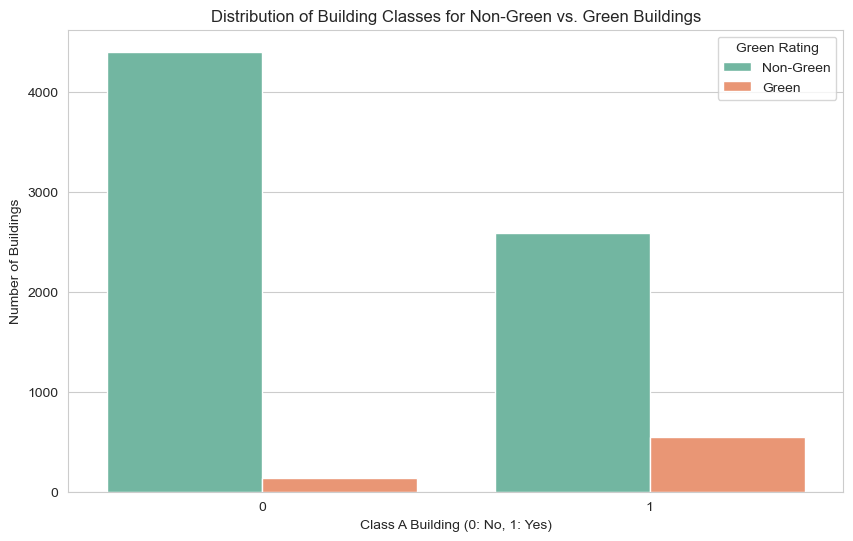

Building Class Counts:
 0    4737
1    3157
Name: class_a, dtype: int64


In [5]:
# Creating a countplot for building classes based on green rating
plt.figure(figsize = (10,6))
sns.countplot(x = 'class_a', hue = 'green_rating', data = cleaned_data, palette = 'Set2')
plt.title('Distribution of Building Classes for Non-Green vs. Green Buildings')
plt.xlabel('Class A Building (0: No, 1: Yes)')
plt.ylabel('Number of Buildings')
plt.legend(title = 'Green Rating', loc = 'upper right', labels = ['Non-Green', 'Green'])
plt.show()

# Statistical Descriptions
class_counts = data['class_a'].value_counts()
print('Building Class Counts:\n', class_counts)

OVERVIEW:
The classification of buildings provides a layered understanding of the property market and the prevalence of green initiatives within these classes.

DISTRIBUTION:
Green buildings, though fewer in number, command a significant presence in the premium market segment. This disparity in the dataset, where about 60% are non-green compared to 40% green, indicates that while eco-friendly initiatives are gaining traction, they haven't fully penetrated the mainstream market yet.

VOLUME:
The sheer number of non-green buildings speaks volumes about their dominance in the market. These buildings, which might lack green credentials, make up the bulk of available commercial spaces. Such a distribution suggests that while green initiatives are appreciated, many developers may prioritize other factors like cost, location, or design.

IMPLICATION:
Rent is invariably tied to a building's classification. Therefore, as we dive deeper into rent distributions, the class of a building will play a significant role in understanding the nuances of rental prices and how green initiatives intersect with these.

# STEP 6: Distribution of Rents by Building Class

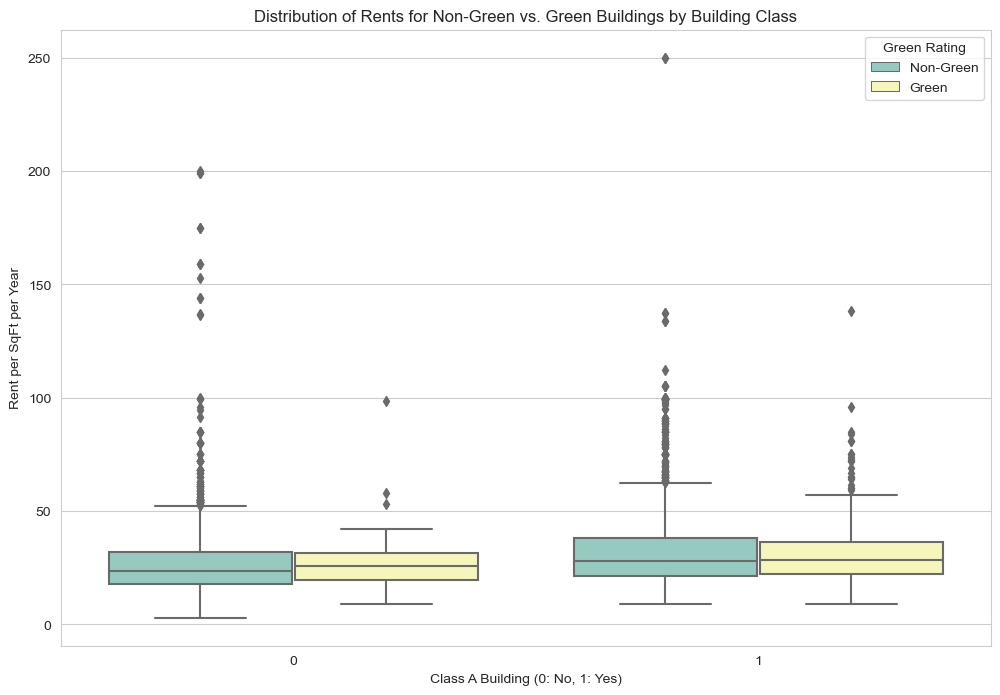

Green Buildings Rent Stats:
 count    3157.000000
mean       32.318416
std        16.533512
min         8.870000
25%        21.690000
50%        28.200000
75%        38.000000
max       250.000000
Name: Rent, dtype: float64

Non-Green Buildings Rent Stats:
 count    4737.000000
mean       25.819493
std        13.405664
min         2.980000
25%        18.000000
50%        23.500000
75%        31.510000
max       200.000000
Name: Rent, dtype: float64


In [6]:
# Creating a boxplot for rents based on building type and class
plt.figure(figsize = (12,8))
sns.boxplot(x = 'class_a', y = 'Rent', hue = 'green_rating', data = cleaned_data, palette = 'Set3')
plt.title('Distribution of Rents for Non-Green vs. Green Buildings by Building Class')
plt.xlabel('Class A Building (0: No, 1: Yes)')
plt.ylabel('Rent per SqFt per Year')

# Adjusting the legend to show appropriate labels
leg = plt.legend(title = 'Green Rating', loc = 'upper right')
new_labels = ['Non-Green', 'Green']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
    
plt.show()

# Statistical Descriptions
green_stats2 = data[data['class_a'] == 1]['Rent'].describe()
non_green_stats2 = data[data['class_a'] == 0]['Rent'].describe()
print("Green Buildings Rent Stats:\n", green_stats2)
print("\nNon-Green Buildings Rent Stats:\n", non_green_stats2)

OVERVIEW:
A closer look at rent distribution by building class gives us a clearer understanding of the profitability spectrum.

DISTRIBUTION:
Green buildings demonstrate a broader rent spectrum, with both the median and standard devation being higher. The high minimum rent suggests that green buildings don't cater to the low-rent segment. However, on the upper end, they can compete and even surpass non-green counterparts.

VOLUME:
While the sheer number of non-green buildings outnumbers green ones, green buildings hold their own, especially in the premium segment of the market. The difference hints at the changing dynamics and potential shift towards sustainability in the premium sector.

IMPLICATION:
Green initiatives and certifications, though still in a minority, have established a premium niche. While non-green buildings cater to a broader segment, the top-tier, higher-rent domain seems to be slowly tilting in favor of eco-friendly, green-certified properties. It's essntial to conitnue monitoring these trends, especially with increasing global emphasis on sustainability and eco-conscious practices.

# STEP 7: Parallel Coordinates Plot & Conclusion

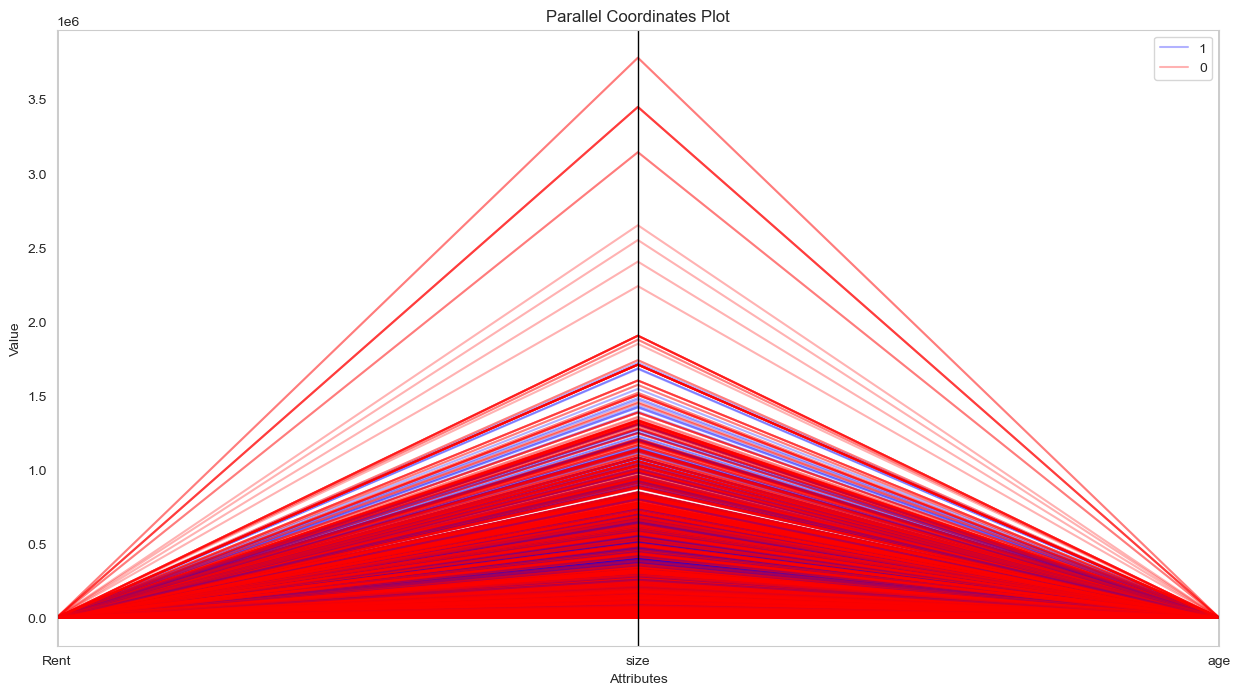

Statistical Description:

              Rent          size          age  green_rating
count  7894.000000  7.894000e+03  7894.000000   7894.000000
mean     28.418569  2.346377e+05    47.243983      0.086775
std      15.075483  2.975334e+05    32.194393      0.281523
min       2.980000  1.624000e+03     0.000000      0.000000
25%      19.500000  5.089125e+04    23.000000      0.000000
50%      25.160000  1.288380e+05    34.000000      0.000000
75%      34.180000  2.942120e+05    79.000000      0.000000
max     250.000000  3.781045e+06   187.000000      1.000000


Distribution of 'green_rating' Column:

0    7209
1     685
Name: green_rating, dtype: int64

Proportion (%) of 'green_rating' Column:

0    0.913225
1    0.086775
Name: green_rating, dtype: float64


In [7]:
# Setting up the data
data_selected = data[['Rent', 'size', 'age', 'green_rating']]

# Plotting the parallel coordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (15,8))
parallel_coordinates(data_selected, 'green_rating', color = ['blue', 'red'], alpha = 0.3)
plt.title('Parallel Coordinates Plot')
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

# Statistical Description
stats_desc = data_selected.describe()
green_counts = data_selected['green_rating'].value_counts()
green_proportion = data_selected['green_rating'].value_counts(normalize = True)
print('Statistical Description:\n')
print(stats_desc)
print("\n\nDistribution of 'green_rating' Column:\n")
print(green_counts)
print("\nProportion (%) of 'green_rating' Column:\n")
print(green_proportion)

The dataset provides insight into various properties, showcasing atttributes like rent, size, age, and green rating. A quick statistical overview reveals a diversity in age, size, and rent of these properties. Particularly notable is the 'green_column' column, which indicates only a small fraction of properties have been recognized for their environmental sustainability.

The parallel coordinates plot plays a pivotal role in understanding the multifaceted nature of the buildings in the dataset. By enabling a side-by-side view of attributes like rent, size, and age in relation to the 'green_rating', the plot uncovers how eco-friendly buildings differ from their counterparts. For instance, it might reveal if green-rated buildings tend to be newer, larger, or perhaps more expensive than other.

Upon closer examination of the statistical breakdown, some intriguing patterns emerge. The average rent stands at approximately 28.42 units, with buildings boasting a wide range of sizes - the mean being around 234,637 square units but with a considerable standard deviation. This suggests a vast diversity in property sizes. Interestingly, the average age of buildings in the dataset is about 47 years, indicating a mix of both historical and contemporary structures. However, what's particularly noteworthy is the 'green_rating'. Out of the 7894 buildings, only 685, or about 8.68%, possess a green certification. This underscores a significant opportunity and need to enhance the sustainability quotient of the majority of buildings, aligning them with environmental goals.

Conclusively, our findings indicate that green buildings, though currently a minority in the dataset, have carved out a niche in the premium segment, commanding higher average rents than their non-green counterparts. Intriguingly, while the rent spectrum is wider for green buildings, suggesting a strong appeal in both middle and top-tier markets, non-green ones, although dominant in number, primarily cater to a broader range of clientele, including the lower-rent segment. Delving deeper into building classifications, we notice a fascinating interplay between class, green credentials, and rent. Notably, building age and size didn't show a direct correlation with rent or green status, pointing towards other influential factors at play. Moreover, the parallel coordinates plot and subsequent statistical analysis further underscored these disparities, emphasizing the tangible impact of green certifications on property valuation. In sum, as the real estate industry evolves amidst growing eco-consciousness, green buildings seem poised to not only gain ground but potentially redefine market standards and expectations in the premium sector.